# Give Me Some Credit

Improve on the state of the art in credit scoring by predicting the probability that somebody will experience financial distress in the next two years.

Features:
-  **SeriousDlqin2yrs**: Person experienced 90 days past due delinquency or worse (*Y/N*)
-  **RevolvingUtilizationOfUnsecuredLines**: Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits (*percentage*)
-  **age**: Age of borrower in years (*integer*)
-  **NumberOfTime30-59DaysPastDueNotWorse**: Number of times borrower has been 30-59 days past due but no worse in the last 2 years (*integer*)
-  **DebtRatio**: Monthly debt payments, alimony,living costs divided by monthy gross income (*percentage*)
-  **MonthlyIncome**: Monthly income (*real*)
-  **NumberOfOpenCreditLinesAndLoans**: Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards) (*integer*)
-  **NumberOfTimes90DaysLate**: Number of times borrower has been 90 days or more past due (*integer*)
-  **NumberRealEstateLoansOrLines**: Number of mortgage and real estate loans including home equity lines of credit (*integer*)
-  **NumberOfTime60-89DaysPastDueNotWorse**: Number of times borrower has been 60-89 days past due but no worse in the last 2 years (*integer*)
-  **NumberOfDependents**: Number of dependents in family excluding themselves (spouse, children etc.) (*integer*)


In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading train, validation, and test datasets

In [2]:
from sklearn.model_selection import train_test_split

def train_val_test_split(df, test_size=0.3, val_size=0.2):
    model_df, test_df = train_test_split(df, test_size=test_size)
    train_df, val_df = train_test_split(model_df, test_size=val_size)
    
    print("Shapes: model {} (train {}, validation {}), test {}".format(model_df.shape,
                                                                       train_df.shape,
                                                                       val_df.shape,
                                                                       test_df.shape))
    
    return(model_df.copy(), train_df.copy(), val_df.copy(), test_df.copy())

In [3]:
data_df = pd.read_csv('data/cs-training.csv',
                      dtype={'SeriousDlqin2yrs': np.int8,
                             'age': np.int8,
                             'NumberOfTime30-59DaysPastDueNotWorse': np.int8,
                             'NumberOfTime60-89DaysPastDueNotWorse': np.int8,
                             'NumberOfTimes90DaysLate': np.int8,
                             'NumberOfOpenCreditLinesAndLoans': np.int8,
                             'NumberRealEstateLoansOrLines': np.int64})

data_df.drop(['Unnamed: 0'], axis = 1, inplace=True)

model_df, train_df, val_df, test_df = train_val_test_split(data_df)

Shapes: model (105000, 11) (train (84000, 11), validation (21000, 11)), test (45000, 11)


In [4]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105000 entries, 17244 to 121677
Data columns (total 11 columns):
SeriousDlqin2yrs                        105000 non-null int8
RevolvingUtilizationOfUnsecuredLines    105000 non-null float64
age                                     105000 non-null int8
NumberOfTime30-59DaysPastDueNotWorse    105000 non-null int8
DebtRatio                               105000 non-null float64
MonthlyIncome                           84174 non-null float64
NumberOfOpenCreditLinesAndLoans         105000 non-null int8
NumberOfTimes90DaysLate                 105000 non-null int8
NumberRealEstateLoansOrLines            105000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    105000 non-null int8
NumberOfDependents                      102250 non-null float64
dtypes: float64(4), int64(1), int8(6)
memory usage: 5.4 MB


In [5]:
model_df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,8.417400e+04,105000.000000,105000.000000,105000.000000,105000.000000,102250.000000
mean,0.066867,6.728830,52.261190,0.422086,353.831995,6.704788e+03,8.461229,0.266400,1.019200,0.242248,0.758592
std,0.249792,281.333802,14.760184,4.211445,2096.190447,1.629815e+04,5.160147,4.188003,1.135868,4.174167,1.118637
min,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029745,41.000000,0.000000,0.174371,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.153435,52.000000,0.000000,0.366371,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.557010,63.000000,0.000000,0.863415,8.250000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


## Default rate

In [6]:
def bar_plot_rates(rates, posplot=111, title=''):
    ax = plt.subplot(posplot)

    sns.barplot(x=rates.index,
                y=rates.values)
    ax.set_xlabel('Default')
    ax.set_ylabel('rate')
    ax.set_ylim([0, 100])
    ax.set_title(title)

    for p in ax.patches:
        ax.annotate('{:.1f}%'.format(p.get_height()), (p.get_x()+p.get_width()/2., p.get_height()),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')

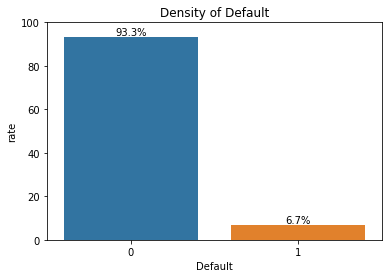

In [7]:
default_rate = 100. * model_df['SeriousDlqin2yrs'].value_counts() / model_df.shape[0]

bar_plot_rates(default_rate, title='Density of Default')
plt.show()

## Missing data analysis

In [8]:
model_df.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           20826
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       2750
dtype: int64

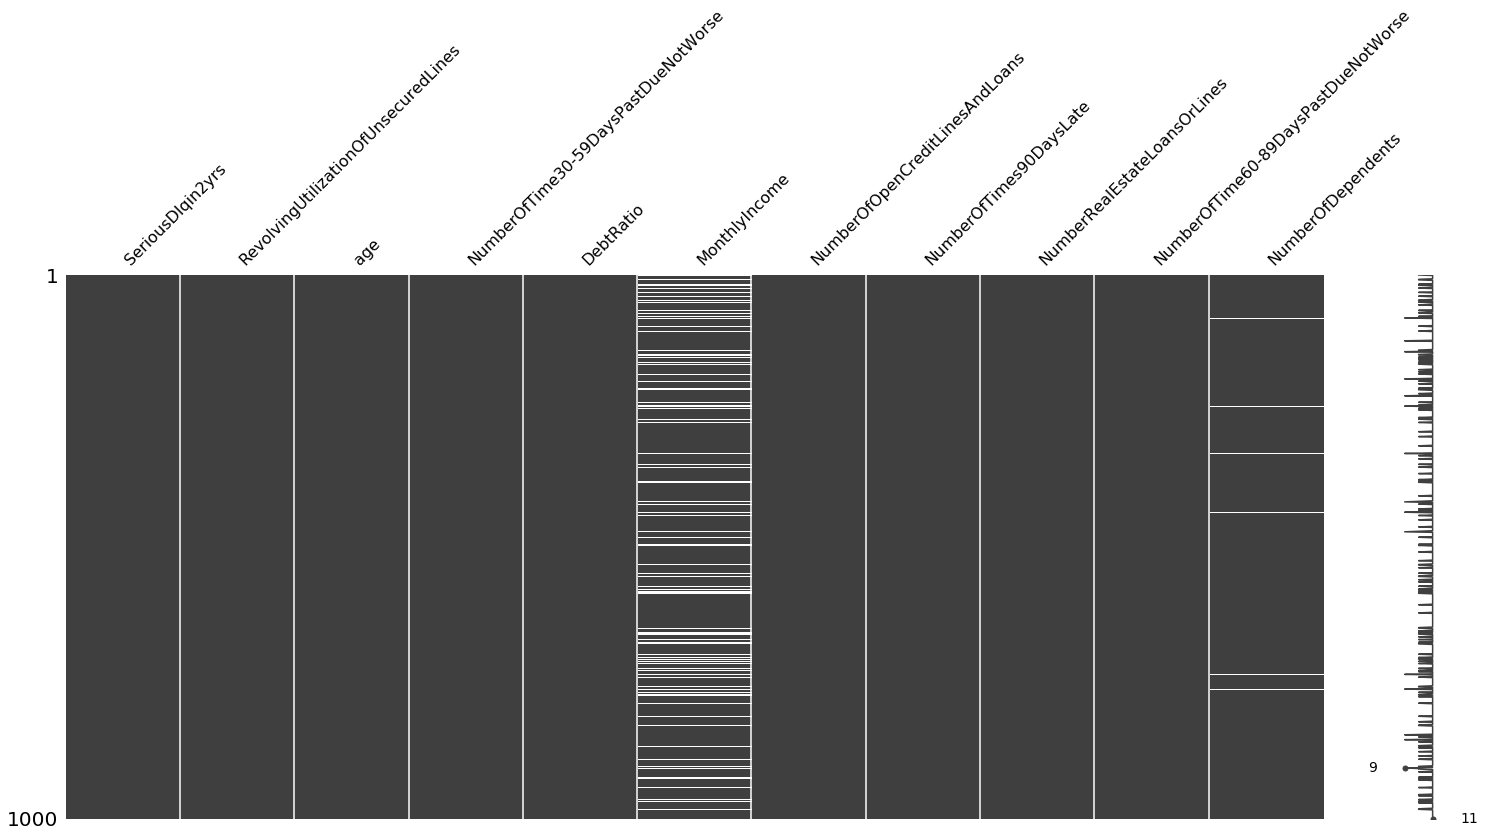

In [9]:
import missingno as msno

msno.matrix(model_df.groupby('SeriousDlqin2yrs').apply(lambda x: x.sample(n=500)))

## Feature exploration

### Age

In [10]:
model_df['age'].describe()

count    105000.000000
mean         52.261190
std          14.760184
min          21.000000
25%          41.000000
50%          52.000000
75%          63.000000
max         109.000000
Name: age, dtype: float64

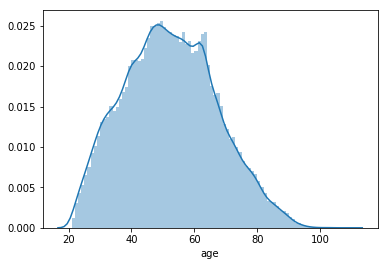

In [11]:
sns.distplot(model_df['age'], np.ptp(model_df['age']))
plt.show()

It seems a Normal distribution, let's check using the Q-Q Plot

In [12]:
def qqplot(x, **kwargs):
    ax = plt.gca()
    xr = sp.stats.probplot(x, plot=ax, fit=True)
    
    ax.get_lines()[0].set_markersize(1.0)
    ax.text(1, 0, '$Slope = {:.3}$\n$Intercept = {:.3}$\n$R² = {:.4}$'.format(*xr[1]))

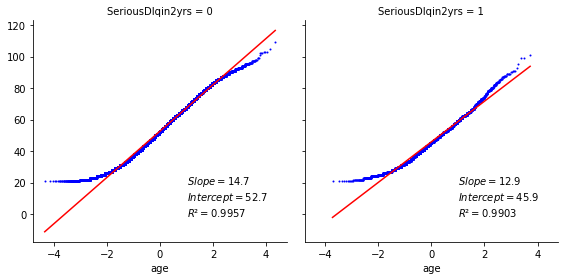

In [13]:
g = sns.FacetGrid(model_df, col="SeriousDlqin2yrs", size=4)
g.map(qqplot, "age")
plt.show()

It follows a Normal distribution.

Let's study if there are some outliers on the distribution...

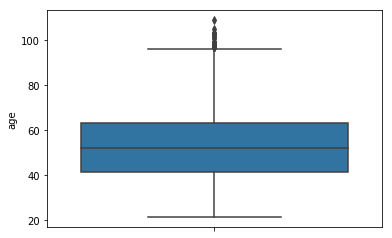

In [14]:
sns.boxplot(model_df['age'], orient='v')
plt.show()

Let's use IQR to detect outliers

In [15]:
Q1 = model_df['age'].quantile(1/4.)
Q3 = model_df['age'].quantile(3/4.)
IQR = Q3 - Q1

eta = 1.5
lower_bound = Q1 - eta * IQR
upper_bound = Q3 + eta * IQR
"bounds: ({}, {})".format(lower_bound, upper_bound)

'bounds: (8.0, 96.0)'

In [16]:
model_df.loc[(model_df['age'] < lower_bound) | (model_df['age'] > upper_bound), 'age'].value_counts()

97     10
99      5
98      4
103     3
102     3
101     2
109     1
105     1
Name: age, dtype: int64

Or, we can be more conservative using a small quantile of 0.9999 as upper bound...

In [17]:
upper_bound = model_df['age'].quantile(0.9999)
upper_bound

99.0

And set the lowes bound to 21, what seems reasonable

In [18]:
lower_bound = 21

In [19]:
model_df.loc[(model_df['age'] < lower_bound) | (model_df['age'] > upper_bound), 'age'].value_counts()

103    3
102    3
101    2
109    1
105    1
Name: age, dtype: int64

Let's see the distribution of age by default

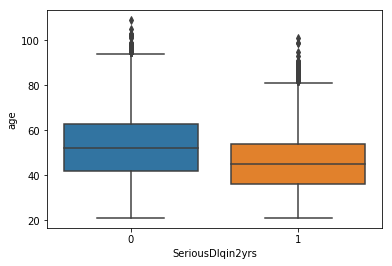

In [20]:
sns.boxplot('SeriousDlqin2yrs', 'age', data=model_df)
plt.show()

#### Conclusion

- it follows a normal distribution;
- it has no missing values;
- it should be cut [21, 99].

## NumberOfDependents

In [21]:
model_df['NumberOfDependents'].describe()

count    102250.000000
mean          0.758592
std           1.118637
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          20.000000
Name: NumberOfDependents, dtype: float64

In [22]:
null_ids = model_df['NumberOfDependents'].isnull()
print('Null values: total of {} rows ({:.2f}%)'.format(null_ids.sum(), null_ids.mean() * 100))

Null values: total of 2750 rows (2.62%)


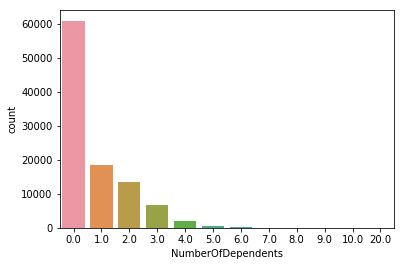

In [23]:
sns.countplot(model_df['NumberOfDependents'].dropna())
plt.show()

In [24]:
model_df['NumberOfDependents'].value_counts()

0.0     60865
1.0     18372
2.0     13591
3.0      6672
4.0      2035
5.0       538
6.0       117
7.0        38
8.0        15
10.0        4
9.0         2
20.0        1
Name: NumberOfDependents, dtype: int64

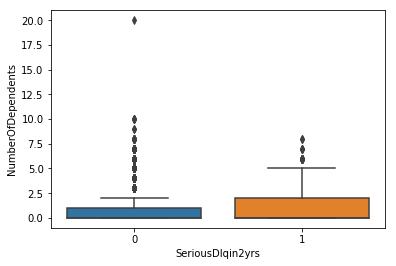

In [25]:
sns.boxplot('SeriousDlqin2yrs', 'NumberOfDependents', data=model_df)
plt.show()

#### Conclusion

- it has 2.6% of missing values;
- may fill NAs = 0;
- upper limit of 10.

## RevolvingUtilizationOfUnsecuredLines

In [26]:
model_df['RevolvingUtilizationOfUnsecuredLines'].describe()

count    105000.000000
mean          6.728830
std         281.333802
min           0.000000
25%           0.029745
50%           0.153435
75%           0.557010
max       50708.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

In [27]:
model_df['RevolvingUtilizationOfUnsecuredLines'].isnull().sum()

0

The feature RevolvingUtilizationOfUnsecuredLines is **a percentage**, so let's study if when higher than 1 brings some predictive information...

In [28]:
(model_df['RevolvingUtilizationOfUnsecuredLines'] > 1).mean()

0.022066666666666665

Only 2.28% of the rows are greater than 1. Let's see how they are distributed

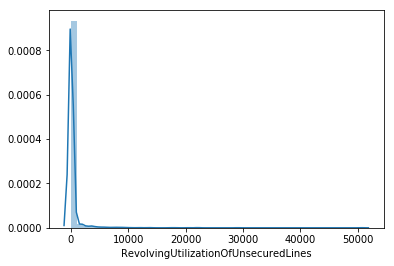

In [29]:
sns.distplot(model_df[model_df['RevolvingUtilizationOfUnsecuredLines'] > 1]['RevolvingUtilizationOfUnsecuredLines'])
plt.show()

Let's see if they bring some predictive information

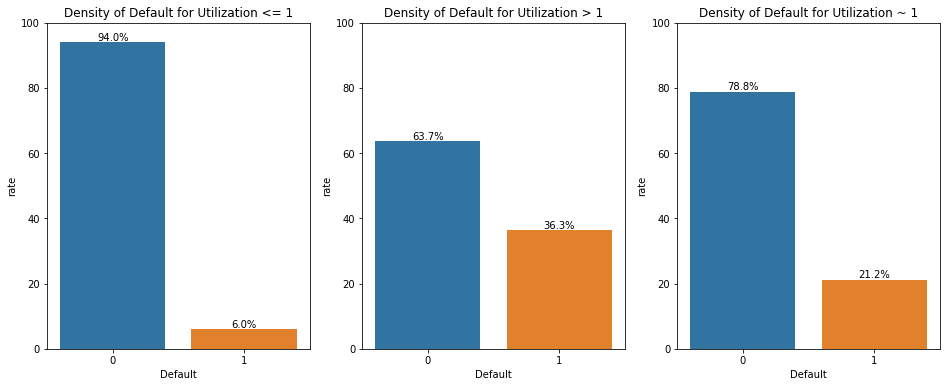

In [30]:
plt.figure(figsize=(16, 6))

tmp_df = model_df[model_df['RevolvingUtilizationOfUnsecuredLines'] <= 1]['SeriousDlqin2yrs']
default_rate = 100. * tmp_df.value_counts() / tmp_df.shape[0]
bar_plot_rates(default_rate, 131, title='Density of Default for Utilization <= 1')

tmp_df = model_df[model_df['RevolvingUtilizationOfUnsecuredLines'] > 1]['SeriousDlqin2yrs']
default_rate = 100. * tmp_df.value_counts() / tmp_df.shape[0]
bar_plot_rates(default_rate, 132, title='Density of Default for Utilization > 1')

tmp_df = model_df[np.isclose(model_df['RevolvingUtilizationOfUnsecuredLines'], 1, atol=0.1)]['SeriousDlqin2yrs']
default_rate = 100. * tmp_df.value_counts() / tmp_df.shape[0]
bar_plot_rates(default_rate, 133, title='Density of Default for Utilization ~ 1')

plt.show()

Let's see the distribution without the values higher than 1.

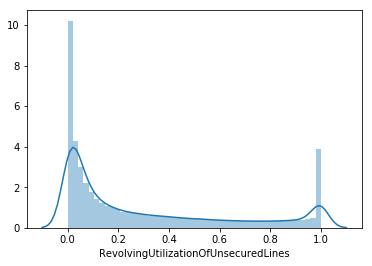

In [31]:
sns.distplot(model_df[model_df['RevolvingUtilizationOfUnsecuredLines'] <= 1]['RevolvingUtilizationOfUnsecuredLines'])
plt.show()

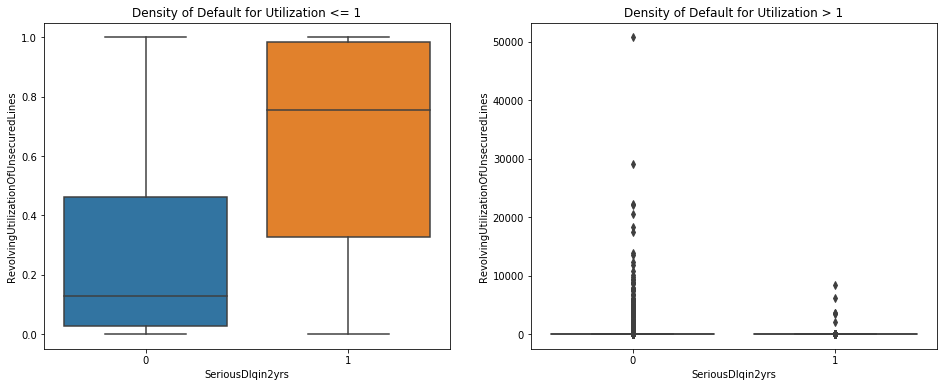

In [32]:
plt.figure(figsize=(16, 6))

ax = plt.subplot(121)
sns.boxplot('SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines',
            data=model_df[model_df['RevolvingUtilizationOfUnsecuredLines'] <= 1])
ax.set_title('Density of Default for Utilization <= 1')

ax = plt.subplot(122)
sns.boxplot('SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines',
            data=model_df[model_df['RevolvingUtilizationOfUnsecuredLines'] > 1])

ax.set_title('Density of Default for Utilization > 1')

plt.show()

#### Conclusion

- it has no missing values;
- values higher than 1 should be preserved somehow.

## NumberOfOpenCreditLinesAndLoans

In [33]:
model_df['NumberOfOpenCreditLinesAndLoans'].describe()

count    105000.000000
mean          8.461229
std           5.160147
min           0.000000
25%           5.000000
50%           8.000000
75%          11.000000
max          58.000000
Name: NumberOfOpenCreditLinesAndLoans, dtype: float64

In [34]:
model_df['NumberOfOpenCreditLinesAndLoans'].isnull().sum()

0

Let's see the distribution of data

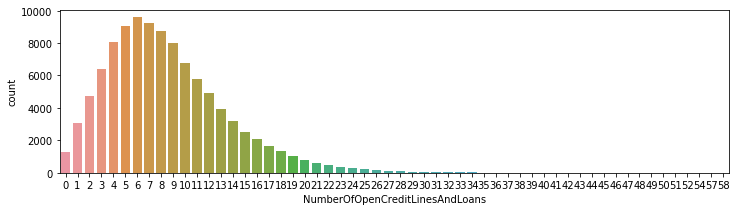

In [35]:
fig, ax = plt.subplots(figsize=(12, 3))
sns.countplot(model_df['NumberOfOpenCreditLinesAndLoans'])
plt.show()

It seems it have a long tail...

In [36]:
model_df['NumberOfOpenCreditLinesAndLoans'].value_counts(sort=False).tail(10)

46    3
47    2
48    6
49    1
50    2
51    2
52    2
54    3
57    2
58    1
Name: NumberOfOpenCreditLinesAndLoans, dtype: int64

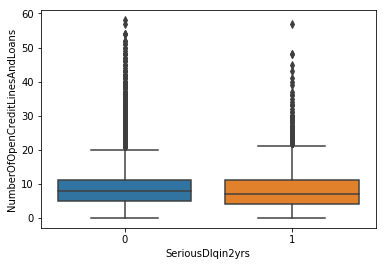

In [37]:
sns.boxplot('SeriousDlqin2yrs', 'NumberOfOpenCreditLinesAndLoans', data=model_df)
plt.show()

#### Conclusion

-  No missing values;
-  It is OK.

## NumberRealEstateLoansOrLines

In [38]:
model_df['NumberRealEstateLoansOrLines'].describe()

count    105000.000000
mean          1.019200
std           1.135868
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max          54.000000
Name: NumberRealEstateLoansOrLines, dtype: float64

In [39]:
model_df['NumberRealEstateLoansOrLines'].isnull().sum()

0

Let's see the distribution of data

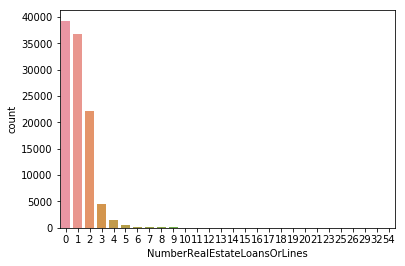

In [40]:
sns.countplot(model_df['NumberRealEstateLoansOrLines'])
plt.show()

It seems it have a long tail...

In [41]:
model_df['NumberRealEstateLoansOrLines'].value_counts(sort=False).tail(10)

18    2
19    2
20    2
21    1
23    2
25    2
26    1
29    1
32    1
54    1
Name: NumberRealEstateLoansOrLines, dtype: int64

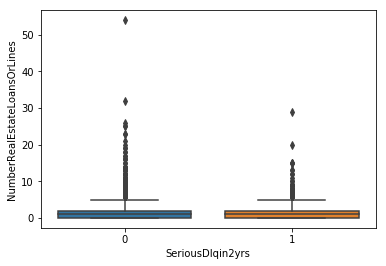

In [42]:
sns.boxplot('SeriousDlqin2yrs', 'NumberRealEstateLoansOrLines', data=model_df)
plt.show()

#### Conclusion

-  No missing values;
-  Just drop values NumberRealEstateLoansOrLines > 19.

## NumberOfTime30–59DaysPastDueNotWorse

In [43]:
model_df['NumberOfTime30-59DaysPastDueNotWorse'].describe()

count    105000.000000
mean          0.422086
std           4.211445
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          98.000000
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: float64

In [44]:
model_df['NumberOfTime30-59DaysPastDueNotWorse'].isnull().sum()

0

Let's see the distribution of data

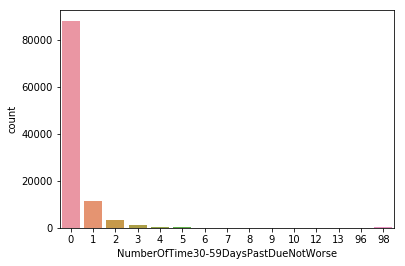

In [45]:
sns.countplot(model_df['NumberOfTime30-59DaysPastDueNotWorse'])
plt.show()

In [46]:
print('Number of flagged rows: {:.2f}%'.format((model_df['NumberOfTime30-59DaysPastDueNotWorse'] >= 96).mean() * 100))

Number of flagged rows: 0.18%


The values 96 and 98 seems very unusual... Let's see if those 'flags' show something on the data

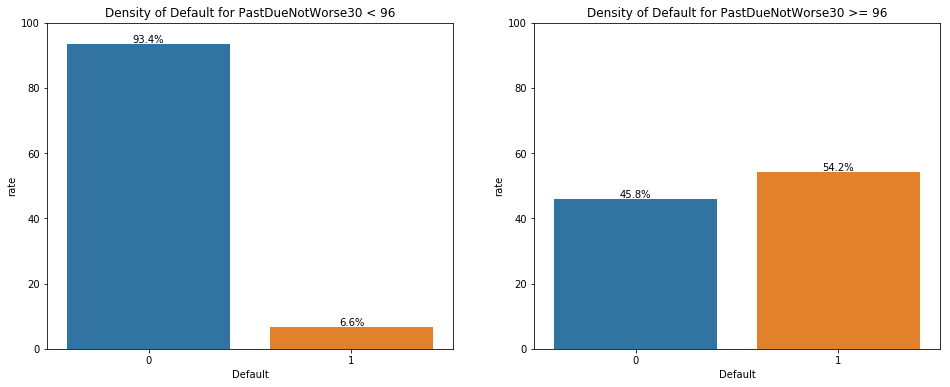

In [47]:
plt.figure(figsize=(16, 6))

tmp_df = model_df[model_df['NumberOfTime30-59DaysPastDueNotWorse'] < 96]['SeriousDlqin2yrs']
default_rate = 100. * tmp_df.value_counts() / tmp_df.shape[0]
bar_plot_rates(default_rate, 121, title='Density of Default for PastDueNotWorse30 < 96')

tmp_df = model_df[model_df['NumberOfTime30-59DaysPastDueNotWorse'] >= 96]['SeriousDlqin2yrs']
default_rate = 100. * tmp_df.value_counts() / tmp_df.shape[0]
bar_plot_rates(default_rate, 122, title='Density of Default for PastDueNotWorse30 >= 96')

plt.show()

#### Conclusion

-  No missing values;
-  Flags 96 and 98 bring some predictive information.

## NumberOfTime60-89DaysPastDueNotWorse

In [48]:
model_df['NumberOfTime60-89DaysPastDueNotWorse'].describe()

count    105000.000000
mean          0.242248
std           4.174167
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          98.000000
Name: NumberOfTime60-89DaysPastDueNotWorse, dtype: float64

In [49]:
model_df['NumberOfTime60-89DaysPastDueNotWorse'].isnull().sum()

0

Let's see the distribution of data

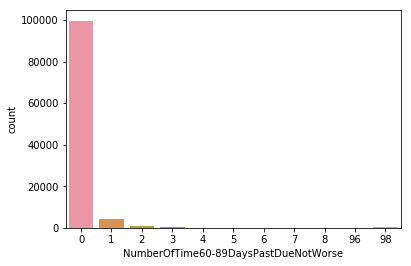

In [50]:
sns.countplot(model_df['NumberOfTime60-89DaysPastDueNotWorse'])
plt.show()

In [51]:
print('Number of flagged rows: {:.2f}%'.format((model_df['NumberOfTime60-89DaysPastDueNotWorse'] >= 96).mean() * 100))

Number of flagged rows: 0.18%


The values 96 and 98 seems very unusual... Let's see if those 'flags' show something on the data

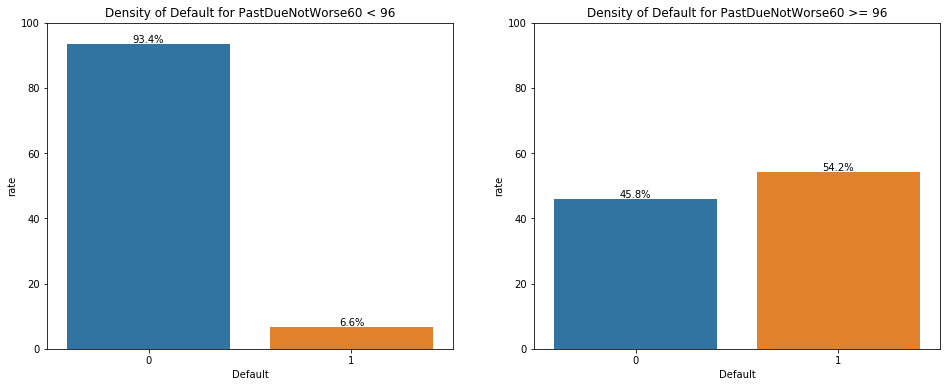

In [52]:
plt.figure(figsize=(16, 6))

tmp_df = model_df[model_df['NumberOfTime60-89DaysPastDueNotWorse'] < 96]['SeriousDlqin2yrs']
default_rate = 100. * tmp_df.value_counts() / tmp_df.shape[0]
bar_plot_rates(default_rate, 121, title='Density of Default for PastDueNotWorse60 < 96')

tmp_df = model_df[model_df['NumberOfTime60-89DaysPastDueNotWorse'] >= 96]['SeriousDlqin2yrs']
default_rate = 100. * tmp_df.value_counts() / tmp_df.shape[0]
bar_plot_rates(default_rate, 122, title='Density of Default for PastDueNotWorse60 >= 96')

plt.show()

#### Conclusion

-  No missing values;
-  Flags 96 and 98 bring some predictive information.

## NumberOfTimes90DaysLate

In [53]:
model_df['NumberOfTimes90DaysLate'].describe()

count    105000.000000
mean          0.266400
std           4.188003
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          98.000000
Name: NumberOfTimes90DaysLate, dtype: float64

In [54]:
model_df['NumberOfTimes90DaysLate'].isnull().sum()

0

Let's see the distribution of data

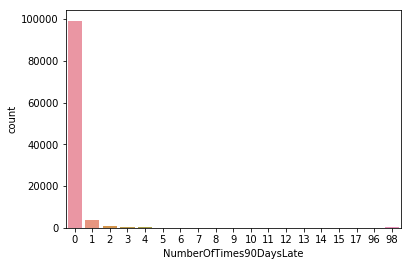

In [55]:
sns.countplot(model_df['NumberOfTimes90DaysLate'])
plt.show()

The values 96 and 98 seems very unusual... Let's see if those 'flags' show something on the data

In [56]:
print('Number of flagged rows: {:.2f}%'.format((model_df['NumberOfTimes90DaysLate'] >= 96).mean() * 100))

Number of flagged rows: 0.18%


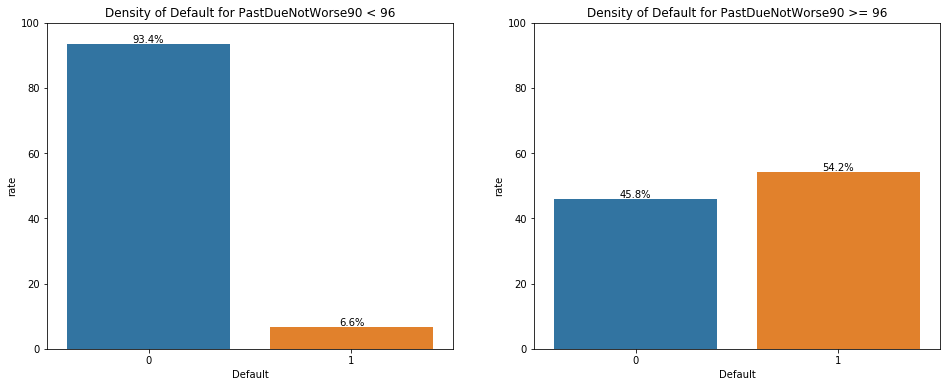

In [57]:
plt.figure(figsize=(16, 6))

tmp_df = model_df[model_df['NumberOfTimes90DaysLate'] < 96]['SeriousDlqin2yrs']
default_rate = 100. * tmp_df.value_counts() / tmp_df.shape[0]
bar_plot_rates(default_rate, 121, title='Density of Default for PastDueNotWorse90 < 96')

tmp_df = model_df[model_df['NumberOfTimes90DaysLate'] >= 96]['SeriousDlqin2yrs']
default_rate = 100. * tmp_df.value_counts() / tmp_df.shape[0]
bar_plot_rates(default_rate, 122, title='Density of Default for PastDueNotWorse90 >= 96')

plt.show()

#### Conclusion

-  No missing values;
-  Flags 96 and 98 bring some predictive information.

In [58]:
a = model_df['NumberOfTime30-59DaysPastDueNotWorse'] >= 96
b = model_df['NumberOfTime60-89DaysPastDueNotWorse'] >= 96
c = model_df['NumberOfTimes90DaysLate'] >= 96

print('Total of rows that are flagged in every column: {}'.format((a | b | c).sum()))

Total of rows that are flagged in every column: 190


## MonthlyIncome

In [59]:
model_df['MonthlyIncome'].describe()

count    8.417400e+04
mean     6.704788e+03
std      1.629815e+04
min      0.000000e+00
25%      3.400000e+03
50%      5.400000e+03
75%      8.250000e+03
max      3.008750e+06
Name: MonthlyIncome, dtype: float64

In [60]:
null_ids = model_df['MonthlyIncome'].isnull()
print('Null values: total of {} rows ({:.2f}%)'.format(null_ids.sum(), null_ids.mean() * 100))

Null values: total of 20826 rows (19.83%)


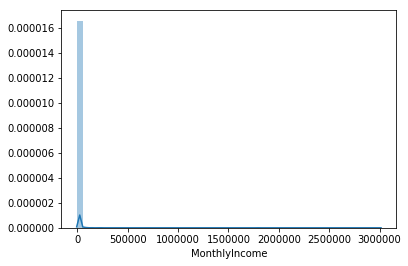

In [61]:
sns.distplot(model_df['MonthlyIncome'].dropna())
plt.show()

Let's transform this variable using Box-Cox (only applicable to positive values)

In [62]:
xt, lmbda = sp.stats.boxcox(model_df[model_df['MonthlyIncome'] > 0]['MonthlyIncome'])

In [63]:
lmbda

0.26586298131351671

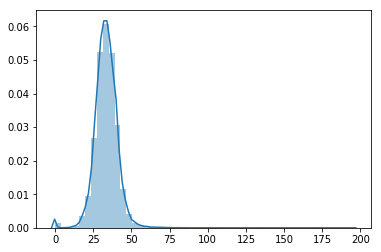

In [64]:
sns.distplot(xt)
plt.show()

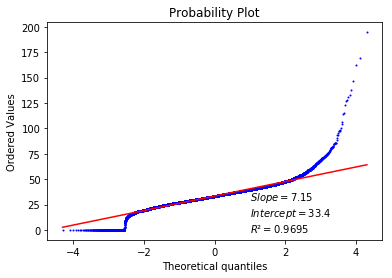

In [65]:
qqplot(xt)
plt.show()

It has long tails...

In [66]:
model_df['MonthlyIncomeBoxCox'] = 0
model_df.loc[model_df['MonthlyIncome'] > 0, 'MonthlyIncomeBoxCox'] = xt

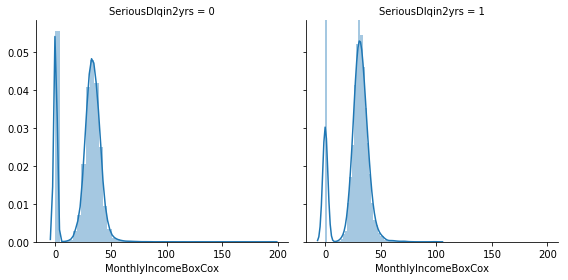

In [67]:
g = sns.FacetGrid(model_df, col="SeriousDlqin2yrs", size=4)
g.map(sns.distplot, "MonthlyIncomeBoxCox")
plt.show()

#### Conclusion

-  20% of the values are missing;
-  The variable may be transformed by Box-Cox and becomes a bell-shaped distribution.

## DebtRatio

In [68]:
model_df['DebtRatio'].describe()

count    105000.000000
mean        353.831995
std        2096.190447
min           0.000000
25%           0.174371
50%           0.366371
75%           0.863415
max      329664.000000
Name: DebtRatio, dtype: float64

In [69]:
model_df['DebtRatio'].isnull().sum()

0

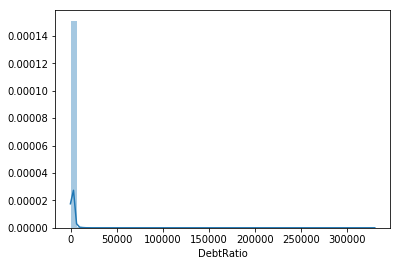

In [70]:
sns.distplot(model_df['DebtRatio'])
plt.show()

It is a ratio, so let's study the values greater than 24 -- two years of debts

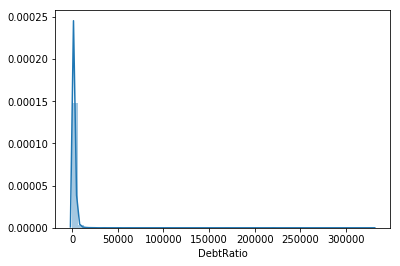

In [71]:
sns.distplot(model_df[model_df['DebtRatio'] > 24]['DebtRatio'])
plt.show()

In [72]:
xt, lmbda2 = sp.stats.boxcox(model_df[model_df['DebtRatio'] > 0]['DebtRatio'])

In [73]:
lmbda2

-0.11605336661687082

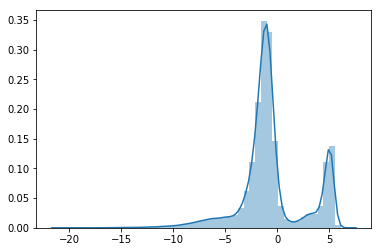

In [74]:
sns.distplot(xt)
plt.show()

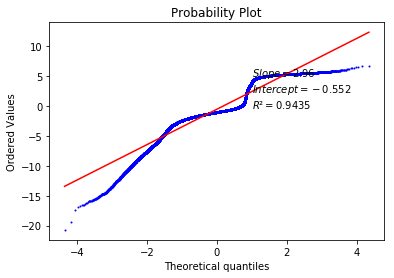

In [75]:
qqplot(xt)
plt.show()

It has long tails

In [76]:
model_df['DebtRatioBoxCox'] = 0
model_df.loc[model_df['DebtRatio'] > 0, 'DebtRatioBoxCox'] = xt

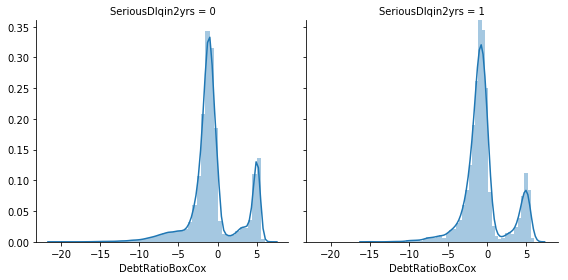

In [77]:
g = sns.FacetGrid(model_df, col="SeriousDlqin2yrs", size=4)
g.map(sns.distplot, "DebtRatioBoxCox")
plt.show()

#### Conclusion

-  No missing values;
-  The variable may be transformed by Box-Cox and becomes a bell-shaped distribution.